In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

In [2]:
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *

jtplot.style('default', grid=False)
plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

In [3]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49,
            'Br3p' : 1.054, 'Br3d' : 1.054,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl2p' : 0.891, 'Si2p': 0.339})

# Analysis experiments on ITO from January/February 2021

## Read processed experiments

In [4]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/**/*.uxy'

files = glob.glob(path, recursive=True)
files.sort()

files

['/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_15_qITO/proc/20210415_1-qITO_FBI_subl_60min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_15_qITO/proc/20210415_1-qITO_as_received.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_15_qITO/proc/20210415_1-qITO_clean.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_28_qITO/proc/20210428_3-qITO_FBI_subl_40min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_28_qITO/proc/20210428_3-qITO_FBI_subl_40min_BaCl2_5min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_28_qITO/proc/20210428_3-qITO_clean.uxy']

In [5]:
fbi_exps = [read_processed_xp(f) for f in files]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_15_qITO/proc/20210415_1-qITO_as_received.uxy.ft', returning empty fit dict


In [6]:
##### fbi_exps = []
ba_exps = []
for f in files:
    if ('FBI_subl_' in f) and ('BaCl2' not in f):
        fbi_exps.append(read_processed_xp(f))
    elif 'BaCl2' in f:
        ba_exps.append(read_processed_xp(f))

clean_exps = []
for f in files:
    if 'clean' in f:
        clean_exps.append(read_processed_xp(f))

## Integrate areas 

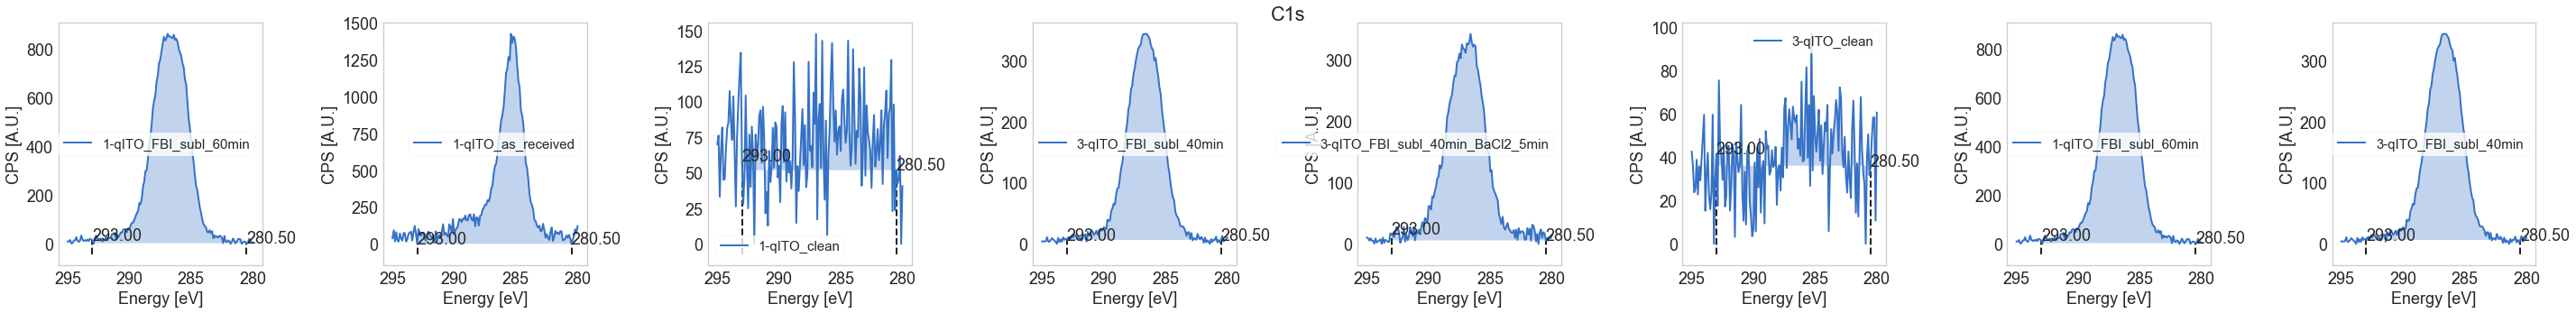

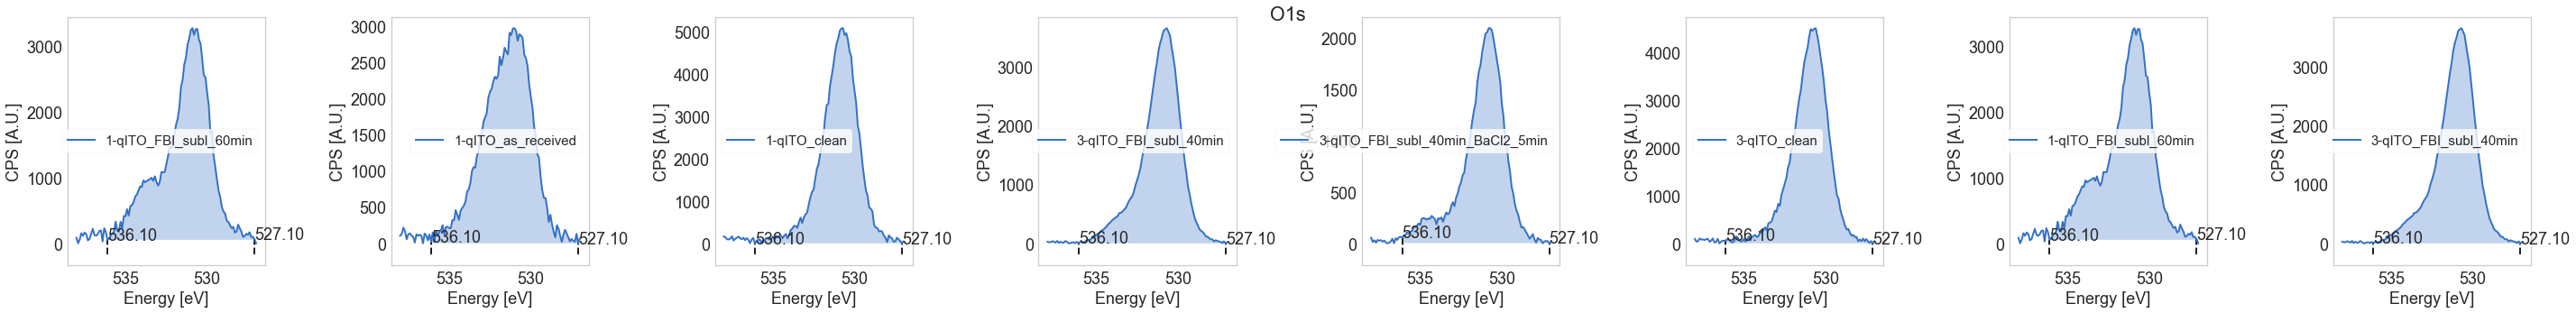

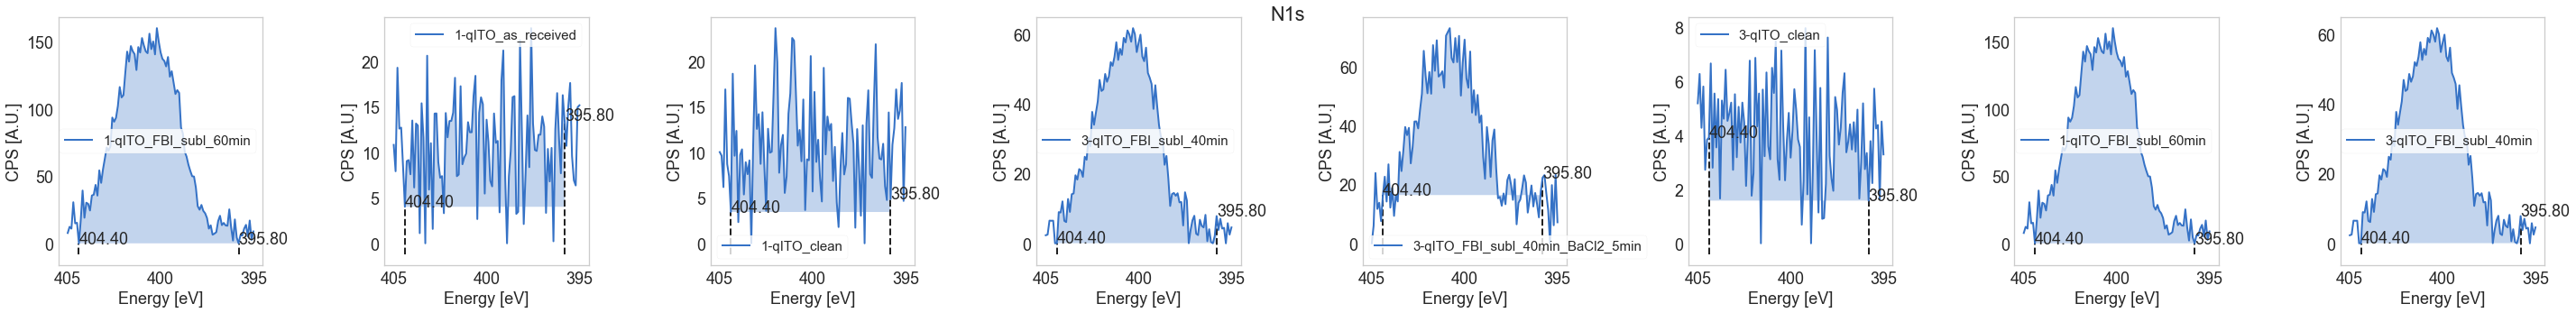

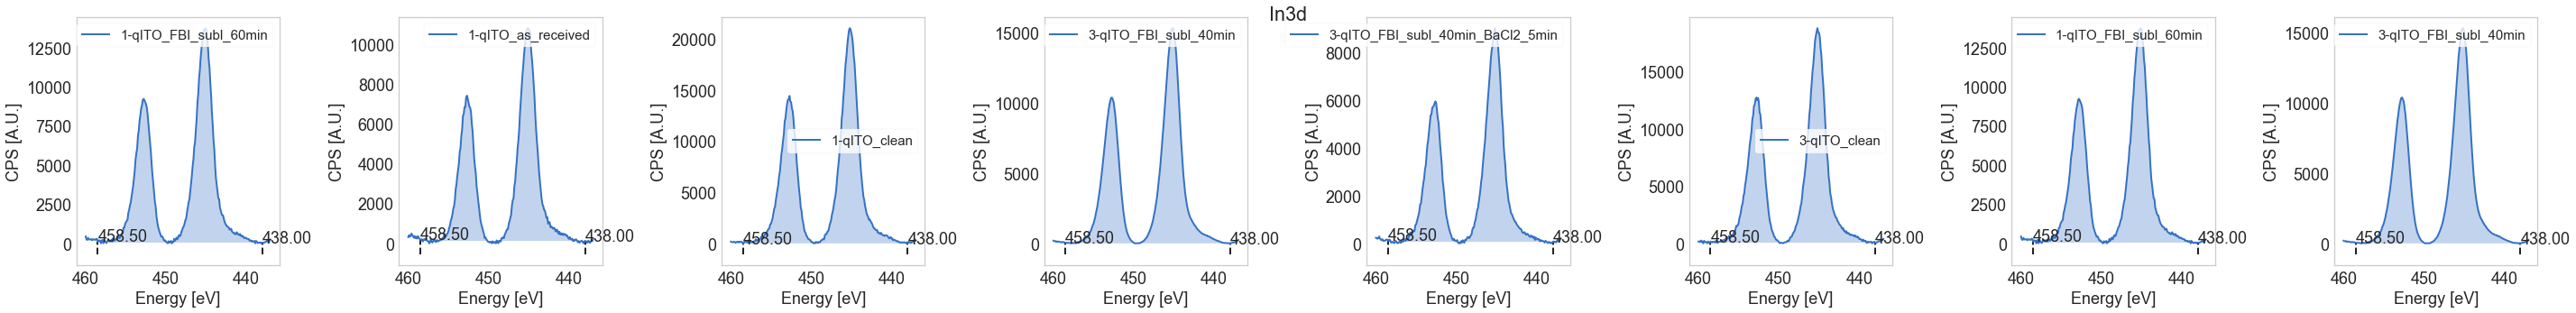

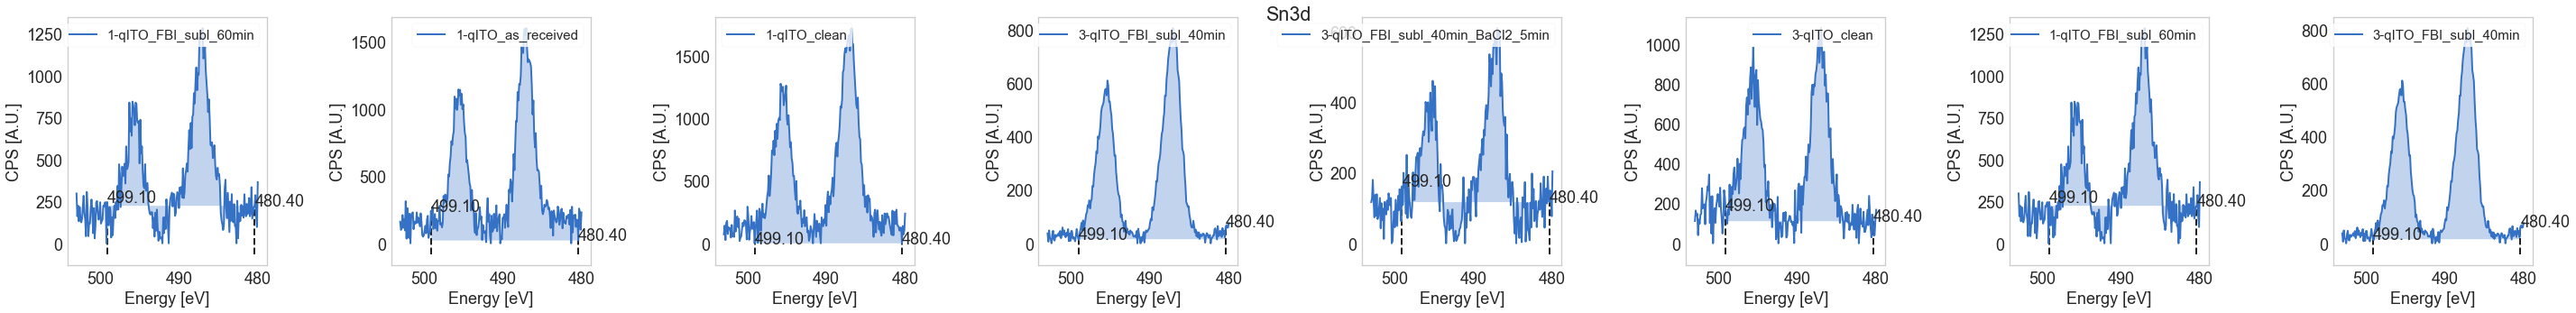

In [7]:
for r in ['C1s', 'O1s', 'N1s', 'In3d', 'Sn3d']:
    integrateRegions(fbi_exps, r, asf=asf)

[2828.119732877375, 2828.119732877375]

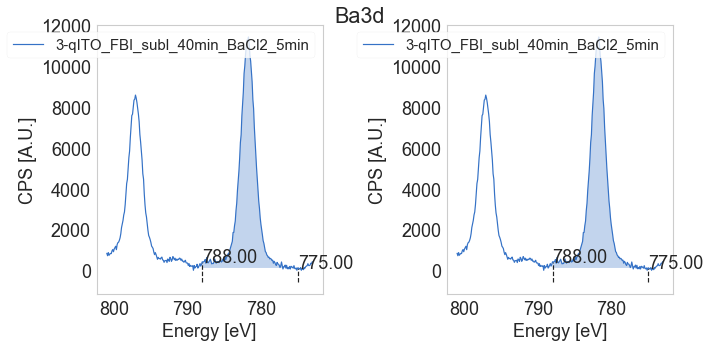

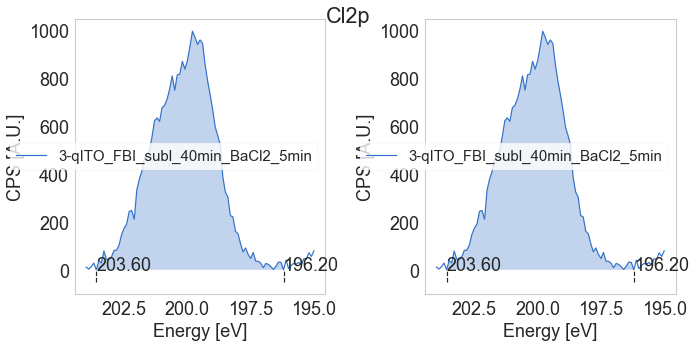

In [20]:
integrateRegions([ba_exps[0], ba_exps[0]], 'Ba3d', asf=asf, eup=788, edw=775)
integrateRegions([ba_exps[0], ba_exps[0]], 'Cl2p', asf=asf)#, eup=788, edw=775)

# Stoichiometry 

In [21]:
num, denom = (('N1s', 'C1s', 'C1s'), ('O1s', 'N1s', 'O1s'))
make_stoichometry_table(fbi_exps,  num=num, denom=denom, sep=' \t ')

Experiment	N/O	C/N	C/O	
1-qITO_FBI_subl_60min 	 0.09  	  7.83  	  0.74  	  
1-qITO_as_received 	 0.01  	  68.02  	  0.90  	  
1-qITO_clean 	 0.01  	  15.54  	  0.17  	  
3-qITO_FBI_subl_40min 	 0.04  	  8.09  	  0.31  	  
3-qITO_FBI_subl_40min_BaCl2_5min 	 0.08  	  6.71  	  0.57  	  
3-qITO_clean 	 0.00  	  23.54  	  0.11  	  
1-qITO_FBI_subl_60min 	 0.09  	  7.83  	  0.74  	  
3-qITO_FBI_subl_40min 	 0.04  	  8.09  	  0.31  	  


In [38]:
num, denom = (('In3d', 'In3d'), ('O1s', 'Sn3d'))
make_stoichometry_table(fbi_exps,  num=num, denom=denom, sep=' \t ')

Experiment	In/O	In/Sn	
1-qITO_FBI_subl_60min 	 0.94  	  9.27  	  
1-qITO_as_received 	 0.72  	  6.18  	  
1-qITO_clean 	 1.15  	  10.61  	  


In [22]:
ba_exps[0].area['FBI0'] = ba_exps[0].area['N1s'] / 3
num, denom = (('Ba3d', 'Ba3d', 'Cl2p'), ('FBI0', 'N1s', 'Ba3d'))
make_stoichometry_table(ba_exps, num, denom, sep=' \t ')

Experiment	Ba/FBI	Ba/N	Cl/Ba	
3-qITO_FBI_subl_40min_BaCl2_5min 	 17.54  	  5.85  	  0.79  	  


In [37]:
print('Nominal')
print('N/O \t C/N \t \t C/O \t Ba/Cl')
print(3/5, '\t', '%.3f'%(31/3), '\t', '%.3f' %(31/5), '\t %.3f' %2 )

Nominal
N/O 	 C/N 	 	 C/O 	 Ba/Cl
0.6 	 10.333 	 6.200 	 2.000


# Coverages

### Convert to layer scale

$$ I_f = (1-x)I_0 + x I_0 \exp\left(-\frac{d_A}{L_{TH} \cos\theta} \right), $$

$$ x = \frac{I_f/I_0 - 1}{  \exp\left(-\frac{ d_{ML} }{ L_{TH} \cos\theta }\right) - 1  } $$

In [16]:
lref = []
li = []
for i, xp in enumerate(fbi_exps):
    if 'clean' in xp.name: lref.append(i)
    else: li.append(i)
if len(lref) == 1:
    inds = li + lref
else:
    print('Too many clean experiments!')

inds

In [10]:
fbi_exps[1].area

{'C1s': 13110.509373355031,
 'N1s': 193.84789340390182,
 'O1s': 14927.883750451549,
 'Si2p': 2100.9983651740627,
 'In3d': 10663.987914217243,
 'Sn3d': 1719.7528400253918,
 'layers': 1.838546449330261,
 'dlayers': 0.032541048148258554}

In [10]:
[xp.name for xp in fbi_exps]

['1-qITO_FBI_subl_60min',
 '1-qITO_as_received',
 '1-qITO_clean',
 '3-qITO_FBI_subl_40min',
 '3-qITO_FBI_subl_40min_BaCl2_5min',
 '3-qITO_clean',
 '1-qITO_FBI_subl_60min',
 '3-qITO_FBI_subl_40min']

In [12]:
from invisible_cities.core.system_of_units import nm

inds = [[0, 1, 2], [3,5]]

layers_fbi = arrange_coverages(fbi_exps, inds,
                               r_ml = 1.1*nm, region='In3d', mfp = 3.05*nm, takeoff = 10)


layers_fbi[:,0], layers_fbi[:,1]

(matrix([[1.15688819],
         [1.8338826 ],
         [0.65514274]]), matrix([[0.03004783],
         [0.03250237],
         [0.0071527 ]]))

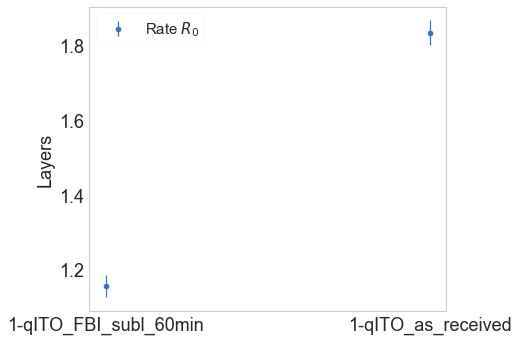

In [13]:
layers, dlayers = [], []
names = []
for xp in fbi_exps:
    try:
        layers.append(xp.area['layers'])
        dlayers.append(xp.area['dlayers'])
        names.append(xp.name)
    except KeyError:
        pass

plt.errorbar(x=names, y=layers, yerr=dlayers, fmt='o', label='Rate $R_0$')

plt.ylabel('Layers')
plt.legend()
# plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublim_v2/FBI_thickness.png', dpi=200)